# THE SPARKS FOUNDATION

**AUTHOR: PRECIOUS IYEKEORETIN**

### Prediction using Unsupervised ML
**It's required to predict the optimum number of clusters and represent it visually.**

#### 1. Importing of libraries and Dataset

In [2]:
# Importing the needed libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")

# Importing of Dataset
Iris_species = pd.read_csv("Iris.csv")
Iris_species.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 2. Data Wrangling and Preparing

In [3]:
Iris_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# checking for missing values
Iris_species.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# checking for duplicate rows
Iris_species.duplicated().sum()

0

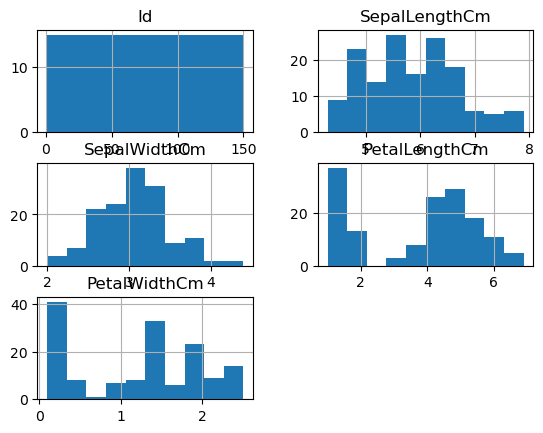

In [6]:
Iris_species.hist();

In [7]:
# stastitical summary of dataset
Iris_species.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### 3. Finding the Optimal number of clusters

In [8]:
# splitting the dataset into features vectors of Independent and dependent values
x = Iris_species.iloc[:, [1,4]]
x.values

array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2],
       [5.4, 0.4],
       [4.6, 0.3],
       [5. , 0.2],
       [4.4, 0.2],
       [4.9, 0.1],
       [5.4, 0.2],
       [4.8, 0.2],
       [4.8, 0.1],
       [4.3, 0.1],
       [5.8, 0.2],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.3],
       [5.7, 0.3],
       [5.1, 0.3],
       [5.4, 0.2],
       [5.1, 0.4],
       [4.6, 0.2],
       [5.1, 0.5],
       [4.8, 0.2],
       [5. , 0.2],
       [5. , 0.4],
       [5.2, 0.2],
       [5.2, 0.2],
       [4.7, 0.2],
       [4.8, 0.2],
       [5.4, 0.4],
       [5.2, 0.1],
       [5.5, 0.2],
       [4.9, 0.1],
       [5. , 0.2],
       [5.5, 0.2],
       [4.9, 0.1],
       [4.4, 0.2],
       [5.1, 0.2],
       [5. , 0.3],
       [4.5, 0.3],
       [4.4, 0.2],
       [5. , 0.6],
       [5.1, 0.4],
       [4.8, 0.3],
       [5.1, 0.2],
       [4.6, 0.2],
       [5.3, 0.2],
       [5. , 0.2],
       [7. , 1.4],
       [6.4, 1.5],
       [6.9,

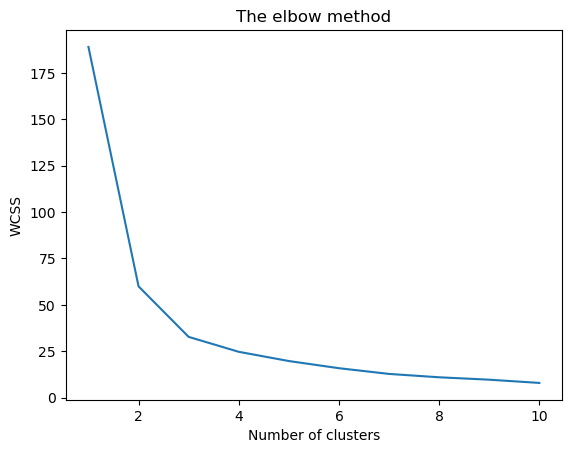

In [9]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### 4. Training the K-Means model

In [10]:
k=KMeans(n_clusters=3)
k.fit(x)
k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0])

In [13]:

Iris_species["cluster_label"]=k.labels_
Iris_species

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


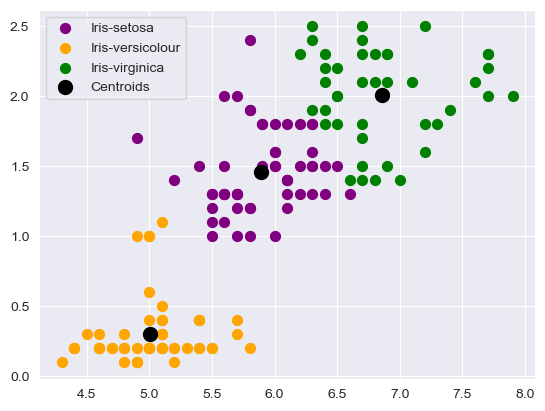

In [36]:
#Visualising the clusters
y1=Iris_species[Iris_species["cluster_label"]==0]
y2=Iris_species[Iris_species["cluster_label"]==1]
y3=Iris_species[Iris_species["cluster_label"]==2]
plt.scatter(y1.SepalLengthCm,y1.PetalWidthCm, s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(y2.SepalLengthCm,y2.PetalWidthCm, s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(y3.SepalLengthCm,y3.PetalWidthCm, s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s=100, c = 'black', label = 'Centroids')
sns.set_style("darkgrid")
plt.legend()
plt.show()